In [171]:
import pandas as pd
import numpy as np
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

#####pandas
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

###### PLOTLY #############
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [18]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

defaulted = train[train['TARGET'] == 1]

In [166]:
train.OWN_CAR_AGE.head(5)

0   NaN  
1   NaN  
2    26.0
3   NaN  
4   NaN  
Name: OWN_CAR_AGE, dtype: float64

In [121]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.to_csv('Missing_Values.csv')

In [149]:
def plot_bar(column_name):
    train_set = train[column_name].value_counts()

    train_set = pd.DataFrame({'labels': train_set.index,
                       'values': train_set.values
                      })
    plt.figure(figsize=(12,5))
    plt.title("Distribution of " + column_name)
    ax = sns.barplot(x="labels", y="values", data=train_set)
    print(train[column_name].value_counts())
    
    d_train_set = defaulted[column_name].value_counts()

    d_train_set = pd.DataFrame({'labels': d_train_set.index,
                       'values': d_train_set.values
                      })
    plt.figure(figsize=(12,5))
    plt.title("Defaulted Distribution of " +  column_name)
    ax = sns.barplot(x="labels", y="values", data=d_train_set)
    print(defaulted[column_name].value_counts())
    
    

In [151]:
def plot_histo(column_name):
    plt.figure(figsize=(12,5))
    plt.title("Distribution of " + column_name)
    ax = sns.distplot(train[column_name].dropna())
    
    plt.figure(figsize=(12,5))
    plt.title("Defaulted Distribution of " + column_name)
    ax = sns.distplot(defaulted[column_name].dropna())

In [169]:
def plot_pie(column_name):
    train_set = train[column_name].value_counts()

    train_set = pd.DataFrame({'labels': train_set.index,
                       'values': train_set.values
                      })

    plt.pie(train_set['values'],labels = train_set['labels'],autopct='%1.1f%%')
    plt.title('Type of Contract')
    plt.show()
    
    d_train_set = defaulted[column_name].value_counts()

    d_train_set = pd.DataFrame({'labels': d_train_set.index,
                       'values': d_train_set.values
                      })

    plt.pie(d_train_set['values'],labels = d_train_set['labels'],autopct='%1.1f%%')
    plt.title('Type of Contract : Defaulted')
    plt.show()

## Distribution of Target

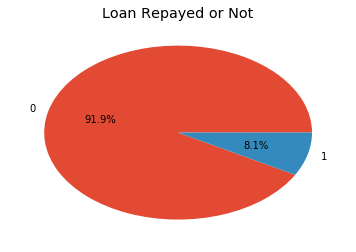

In [16]:
target_set = train["TARGET"].value_counts()

target_set = pd.DataFrame({'labels': target_set.index,
                   'values': target_set.values
                  })

plt.pie(target_set['values'],labels = target_set['labels'],autopct='%1.1f%%')
plt.title('Loan Repayed or Not')
plt.show()

## NAME_CONTRACT_TYPE

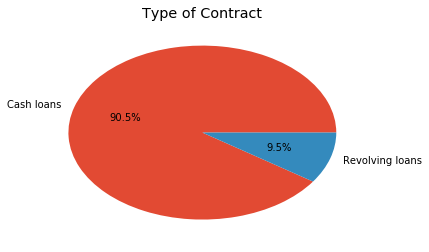

In [17]:
contract_type_set = train["NAME_CONTRACT_TYPE"].value_counts()

contract_type_set = pd.DataFrame({'labels': contract_type_set.index,
                   'values': contract_type_set.values
                  })

plt.pie(contract_type_set['values'],labels = contract_type_set['labels'],autopct='%1.1f%%')
plt.title('Type of Contract')
plt.show()

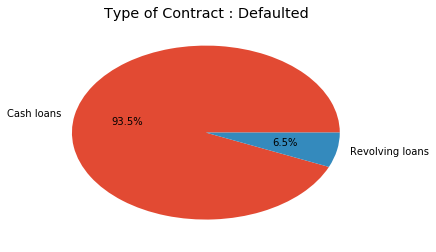

In [21]:
defaulted_contract_type_set = defaulted["NAME_CONTRACT_TYPE"].value_counts()

defaulted_contract_type_set = pd.DataFrame({'labels': defaulted_contract_type_set.index,
                   'values': defaulted_contract_type_set.values
                  })

plt.pie(defaulted_contract_type_set['values'],labels = defaulted_contract_type_set['labels'],autopct='%1.1f%%')
plt.title('Type of Contract : Defaulted')
plt.show()

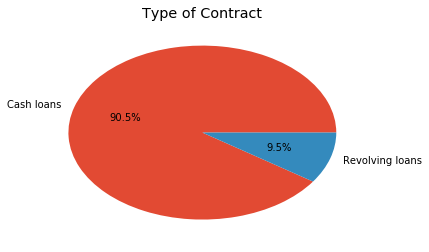

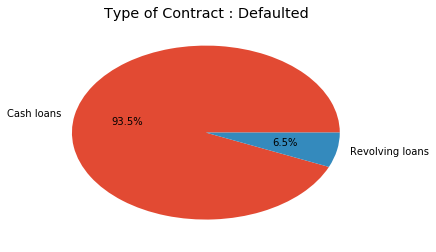

In [170]:
plot_pie("NAME_CONTRACT_TYPE")

## CODE_GENDER

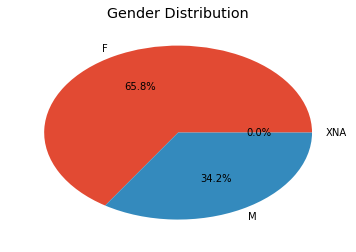

In [22]:
gender_set = train["CODE_GENDER"].value_counts()

gender_set = pd.DataFrame({'labels': gender_set.index,
                   'values': gender_set.values
                  })

plt.pie(gender_set['values'],labels = gender_set['labels'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [26]:
xna = train[train["CODE_GENDER"]=='XNA']
xna

#There are 4 input with XNA, and all Paid their loans, therefore, we can consider changing Gender or remove this entry?

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


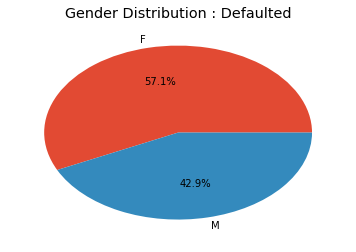

In [27]:
defaulted_gender_set = defaulted["CODE_GENDER"].value_counts()

defaulted_gender_set = pd.DataFrame({'labels': defaulted_gender_set.index,
                   'values': defaulted_gender_set.values
                  })

plt.pie(defaulted_gender_set['values'],labels = defaulted_gender_set['labels'],autopct='%1.1f%%')
plt.title('Gender Distribution : Defaulted')
plt.show()

## FLAG_OWN_CAR

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


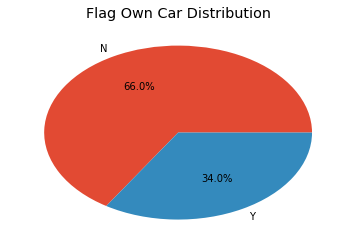

In [52]:
flag_car_set = train["FLAG_OWN_CAR"].value_counts()

flag_car_set = pd.DataFrame({'labels': flag_car_set.index,
                   'values': flag_car_set.values
                  })

plt.pie(flag_car_set['values'],labels = flag_car_set['labels'],autopct='%1.1f%%')
plt.title('Flag Own Car Distribution')
# plt.show()

print(train["FLAG_OWN_CAR"].value_counts())

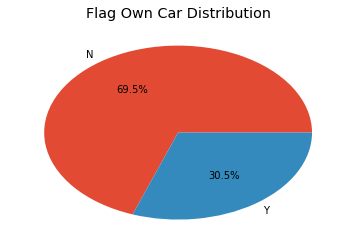

N    17249
Y    7576 
Name: FLAG_OWN_CAR, dtype: int64


In [53]:
defaulted_flag_car_set = defaulted["FLAG_OWN_CAR"].value_counts()

defaulted_flag_car_set = pd.DataFrame({'labels': defaulted_flag_car_set.index,
                   'values': defaulted_flag_car_set.values
                  })
plt.pie(defaulted_flag_car_set['values'],labels = defaulted_flag_car_set['labels'],autopct='%1.1f%%')
plt.title('Flag Own Car Distribution')
plt.show()

print(defaulted["FLAG_OWN_CAR"].value_counts())

## FLAG_OWN_REALTY

Y    213312
N    94199 
Name: FLAG_OWN_REALTY, dtype: int64


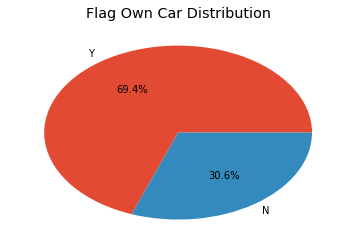

In [54]:
flag_realty_set = train["FLAG_OWN_REALTY"].value_counts()

flag_realty_set = pd.DataFrame({'labels': flag_realty_set.index,
                   'values': flag_realty_set.values
                  })

plt.pie(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
plt.title('Flag Own Car Distribution')
# plt.show()

print(train["FLAG_OWN_REALTY"].value_counts())

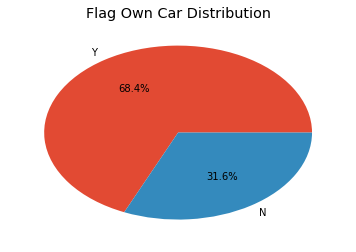

Y    16983
N    7842 
Name: FLAG_OWN_REALTY, dtype: int64


In [56]:
defaulted_flag_realty_set = defaulted["FLAG_OWN_REALTY"].value_counts()

defaulted_flag_realty_set = pd.DataFrame({'labels': defaulted_flag_realty_set.index,
                   'values': defaulted_flag_realty_set.values
                  })

plt.pie(defaulted_flag_realty_set['values'],labels = defaulted_flag_realty_set['labels'],autopct='%1.1f%%')
plt.title('Flag Own Car Distribution')
plt.show()

print(defaulted["FLAG_OWN_REALTY"].value_counts())

## CNT_CHILDREN

AxesSubplot(0.125,0.125;0.775x0.755)
0     215371
1     61119 
2     26749 
3     3717  
4     429   
5     84    
6     21    
7     7     
14    3     
19    2     
12    2     
10    2     
9     2     
8     2     
11    1     
Name: CNT_CHILDREN, dtype: int64


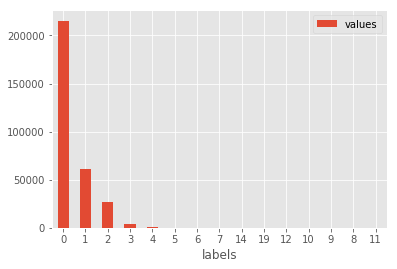

In [66]:
children_set = train["CNT_CHILDREN"].value_counts()

children_set = pd.DataFrame({'labels': children_set.index,
                   'values': children_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()

ax = children_set.plot.bar(x = 'labels', y = 'values', rot =0 )
print(ax)
print(train["CNT_CHILDREN"].value_counts())

AxesSubplot(0.125,0.125;0.775x0.755)
0     16609
1     5454 
2     2333 
3     358  
4     55   
5     7    
6     6    
9     2    
11    1    
Name: CNT_CHILDREN, dtype: int64


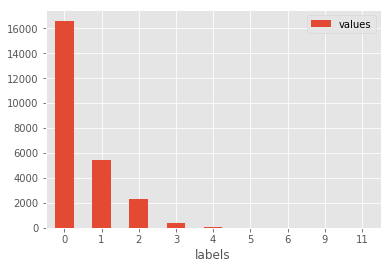

In [65]:
defaulted_children_set = defaulted["CNT_CHILDREN"].value_counts()

defaulted_children_set = pd.DataFrame({'labels': defaulted_children_set.index,
                   'values': defaulted_children_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()

ax = defaulted_children_set.plot.bar(x = 'labels', y = 'values', rot =0 )
print(ax)
print(defaulted["CNT_CHILDREN"].value_counts())

## AMT_INCOME_TOTAL

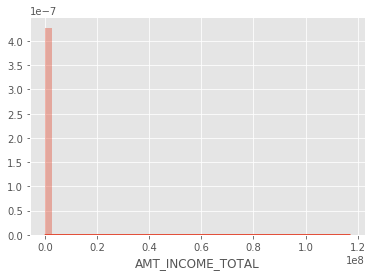

In [80]:
ax = sns.distplot(train["AMT_INCOME_TOTAL"].dropna())

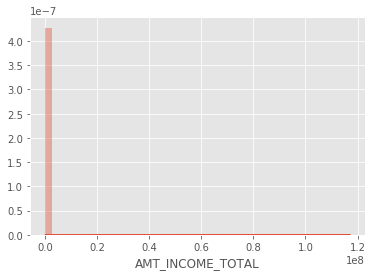

In [82]:
ax = sns.distplot(defaulted["AMT_INCOME_TOTAL"].dropna())

In [86]:
print('################ TRAIN SET ##################')
print(train["AMT_INCOME_TOTAL"].describe())
print('\n################ DEFAULTED DATA SET ##################')
print(defaulted["AMT_INCOME_TOTAL"].describe())

################ TRAIN SET ##################
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

################ DEFAULTED DATA SET ##################
count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [93]:
anom_income = train[train["AMT_INCOME_TOTAL"] > 10000000]

len(anom_income)

3

In [94]:
anom_income = defaulted[defaulted["AMT_INCOME_TOTAL"] > 10000000]

len(anom_income)

1

## AMT_CREDIT

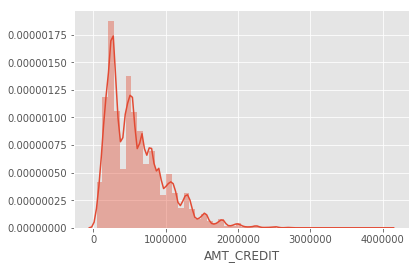

In [96]:
ax = sns.distplot(train["AMT_CREDIT"].dropna())

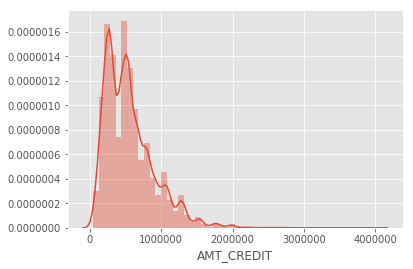

In [83]:
ax = sns.distplot(defaulted["AMT_CREDIT"].dropna())

In [99]:
print('################ TRAIN SET ##################')
print(train["AMT_CREDIT"].describe())
print('\n################ DEFAULTED DATA SET ##################')
print(defaulted["AMT_CREDIT"].describe())

################ TRAIN SET ##################
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

################ DEFAULTED DATA SET ##################
count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64


## AMT_ANNUITY

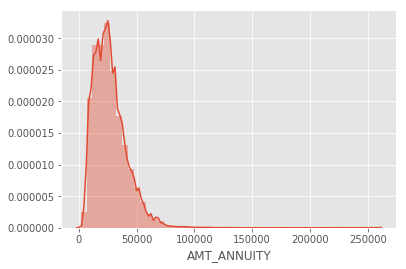

In [97]:
ax = sns.distplot(train["AMT_ANNUITY"].dropna())

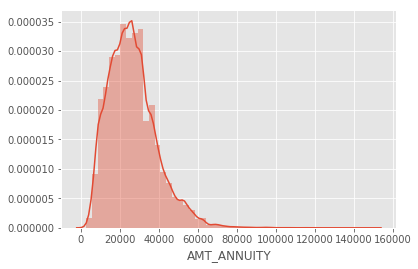

In [98]:
ax = sns.distplot(defaulted["AMT_ANNUITY"].dropna())

In [100]:
print('################ TRAIN SET ##################')
print(train["AMT_ANNUITY"].describe())
print('\n################ DEFAULTED DATA SET ##################')
print(defaulted["AMT_ANNUITY"].describe())

################ TRAIN SET ##################
count    307499.000000
mean     27108.573909 
std      14493.737315 
min      1615.500000  
25%      16524.000000 
50%      24903.000000 
75%      34596.000000 
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

################ DEFAULTED DATA SET ##################
count    24825.000000 
mean     26481.744290 
std      12450.676999 
min      2722.500000  
25%      17361.000000 
50%      25263.000000 
75%      32976.000000 
max      149211.000000
Name: AMT_ANNUITY, dtype: float64


## AMT_GOODS_PRICE

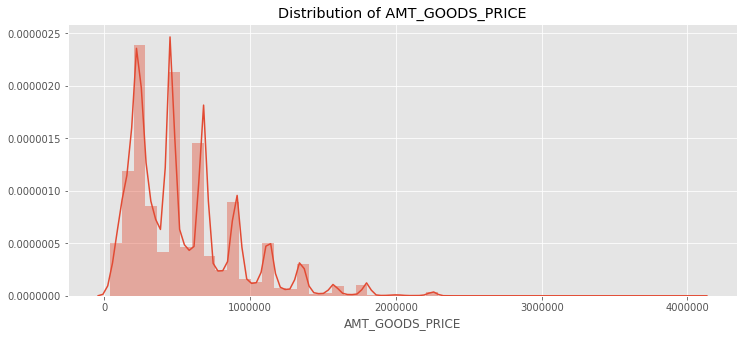

In [101]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(train["AMT_GOODS_PRICE"].dropna())

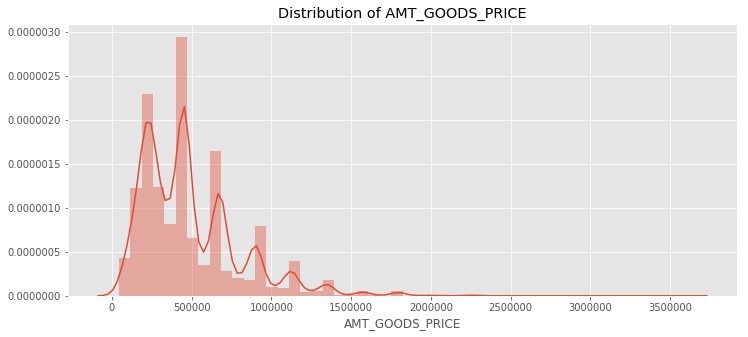

In [102]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(defaulted["AMT_GOODS_PRICE"].dropna())

In [103]:
print('################ TRAIN SET ##################')
print(train["AMT_GOODS_PRICE"].describe())
print('\n################ DEFAULTED DATA SET ##################')
print(defaulted["AMT_GOODS_PRICE"].describe())

################ TRAIN SET ##################
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

################ DEFAULTED DATA SET ##################
count    2.480400e+04
mean     4.889724e+05
std      3.116365e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64


## Ratio of Credit / Goods

################ TRAIN SET ##################
count    307511.000000
mean     0.899875     
std      0.100308     
min      0.000000     
25%      0.834725     
50%      0.893815     
75%      1.000000     
max      6.666667     
dtype: float64


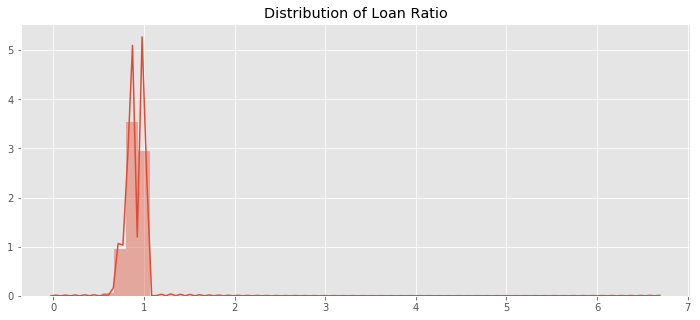

In [123]:
train_copy = train.copy()
train_copy["AMT_CREDIT"].fillna(1, inplace=True)
train_copy["AMT_GOODS_PRICE"].fillna(0, inplace=True)
credit_ratio = train_copy["AMT_GOODS_PRICE"]/train_copy["AMT_CREDIT"]

plt.figure(figsize=(12,5))
plt.title("Distribution of Loan Ratio")
ax = sns.distplot(credit_ratio)

print('################ TRAIN SET ##################')
print(credit_ratio.describe())

################ TRAIN SET ##################
count    24825.000000
mean     0.878618    
std      0.102223    
min      0.000000    
25%      0.825626    
50%      0.873210    
75%      1.000000    
max      3.000000    
dtype: float64


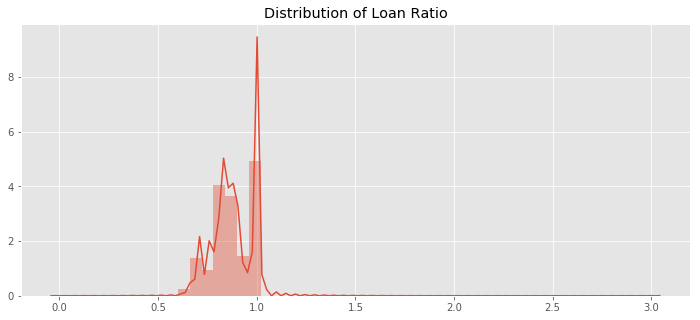

In [122]:
defaulted_train_copy = defaulted.copy()
defaulted_train_copy["AMT_CREDIT"].fillna(1, inplace=True)
defaulted_train_copy["AMT_GOODS_PRICE"].fillna(0, inplace=True)
credit_ratio = defaulted_train_copy["AMT_GOODS_PRICE"]/defaulted_train_copy["AMT_CREDIT"]

plt.figure(figsize=(12,5))
plt.title("Distribution of Loan Ratio")
ax = sns.distplot(credit_ratio)

print('################ Defaulted SET ##################')
print(credit_ratio.describe())

## NAME_TYPE_SUITE

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64


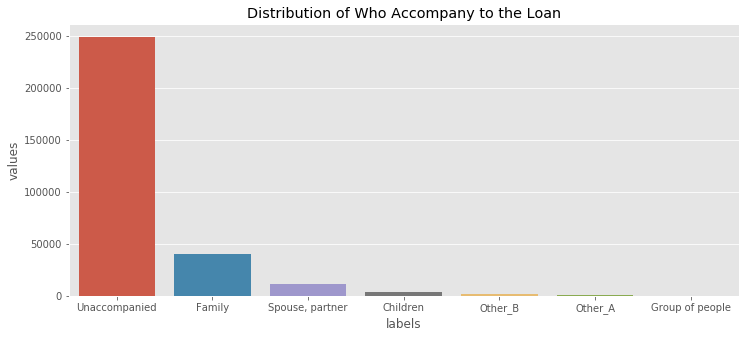

In [116]:
name_type_suite_set = train["NAME_TYPE_SUITE"].value_counts()

name_type_suite_set = pd.DataFrame({'labels': name_type_suite_set.index,
                   'values': name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Who Accompany to the Loan")
ax = sns.barplot(x="labels", y="values", data=name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(train["NAME_TYPE_SUITE"].value_counts())

Unaccompanied      20337
Family             3009 
Spouse, partner    895  
Children           241  
Other_B            174  
Other_A            76   
Group of people    23   
Name: NAME_TYPE_SUITE, dtype: int64


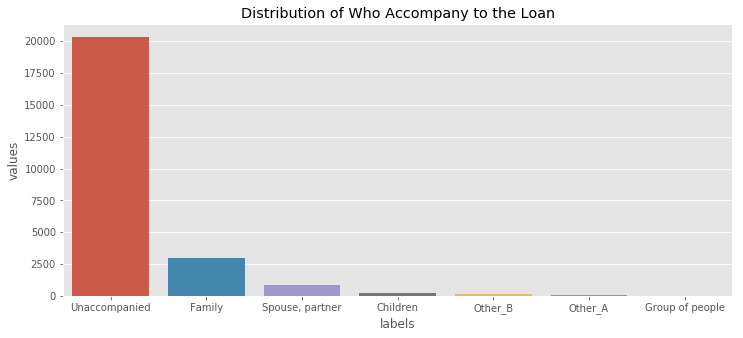

In [117]:
name_type_suite_set = defaulted["NAME_TYPE_SUITE"].value_counts()

name_type_suite_set = pd.DataFrame({'labels': name_type_suite_set.index,
                   'values': name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Who Accompany to the Loan")
ax = sns.barplot(x="labels", y="values", data=name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(defaulted["NAME_TYPE_SUITE"].value_counts())

## NAME_INCOME_TYPE

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64


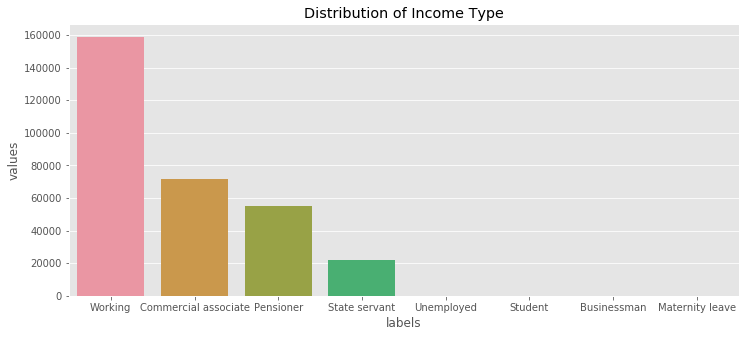

In [119]:
name_type_suite_set = train["NAME_INCOME_TYPE"].value_counts()

name_type_suite_set = pd.DataFrame({'labels': name_type_suite_set.index,
                   'values': name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Income Type")
ax = sns.barplot(x="labels", y="values", data=name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(train["NAME_INCOME_TYPE"].value_counts())

Working                 15224
Commercial associate    5360 
Pensioner               2982 
State servant           1249 
Unemployed              8    
Maternity leave         2    
Name: NAME_INCOME_TYPE, dtype: int64


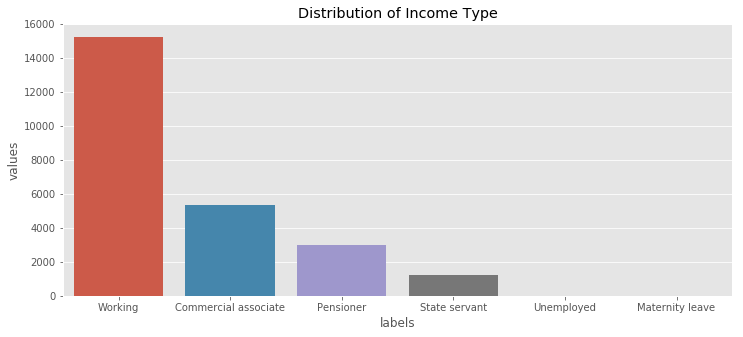

In [118]:
name_type_suite_set = defaulted["NAME_INCOME_TYPE"].value_counts()

name_type_suite_set = pd.DataFrame({'labels': name_type_suite_set.index,
                   'values': name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Income Type")
ax = sns.barplot(x="labels", y="values", data=name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(defaulted["NAME_INCOME_TYPE"].value_counts())

## NAME_HOUSING_TYPE

House / apartment      272868
With parents           14840 
Municipal apartment    11183 
Rented apartment       4881  
Office apartment       2617  
Co-op apartment        1122  
Name: NAME_HOUSING_TYPE, dtype: int64


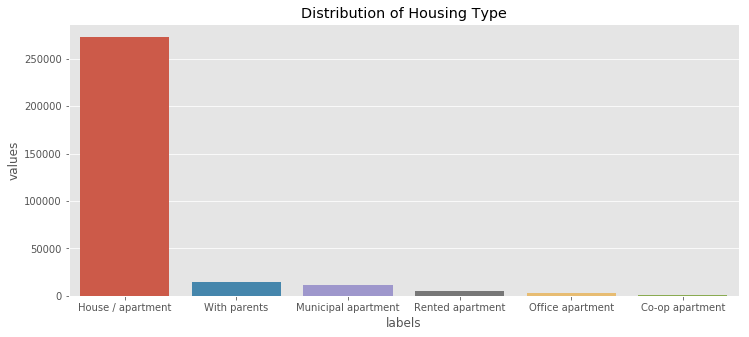

In [136]:
name_type_suite_set = train["NAME_HOUSING_TYPE"].value_counts()

name_type_suite_set = pd.DataFrame({'labels': name_type_suite_set.index,
                   'values': name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Housing Type")
ax = sns.barplot(x="labels", y="values", data=name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(train["NAME_HOUSING_TYPE"].value_counts())

House / apartment      21272
With parents           1736 
Municipal apartment    955  
Rented apartment       601  
Office apartment       172  
Co-op apartment        89   
Name: NAME_HOUSING_TYPE, dtype: int64


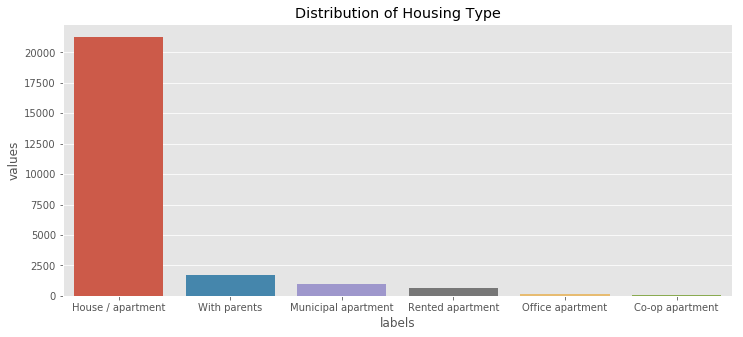

In [137]:
defaulted_name_type_suite_set = defaulted["NAME_HOUSING_TYPE"].value_counts()

defaulted_name_type_suite_set = pd.DataFrame({'labels': defaulted_name_type_suite_set.index,
                   'values': defaulted_name_type_suite_set.values
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Housing Type")
ax = sns.barplot(x="labels", y="values", data=defaulted_name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
print(defaulted["NAME_HOUSING_TYPE"].value_counts())

In [145]:
ratio = defaulted_name_type_suite_set['values'] / name_type_suite_set['values']
ratio

0    0.077957
1    0.116981
2    0.085397
3    0.123131
4    0.065724
5    0.079323
Name: values, dtype: float64

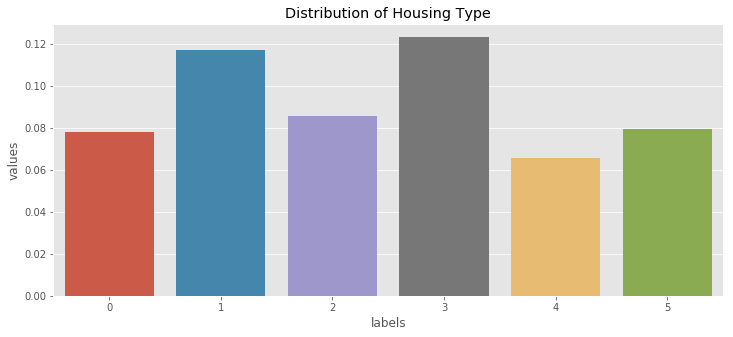

In [144]:
ratio_name_type_suite_set = pd.DataFrame({'labels': defaulted_name_type_suite_set.index,
                   'values': ratio
                  })

# plt.plot.bar(flag_realty_set['values'],labels = flag_realty_set['labels'],autopct='%1.1f%%')
# plt.title('Cnt Children Distribution')
# # plt.show()
plt.figure(figsize=(12,5))
plt.title("Distribution of Housing Type")
ax = sns.barplot(x="labels", y="values", data=ratio_name_type_suite_set)

# ax = name_type_suite_set.plot.bar(x = 'labels', y = 'values', rot =0 )
# print(ax)
# print(defaulted["NAME_HOUSING_TYPE"].value_counts())

## REGION_POPULATION_RELATIVE

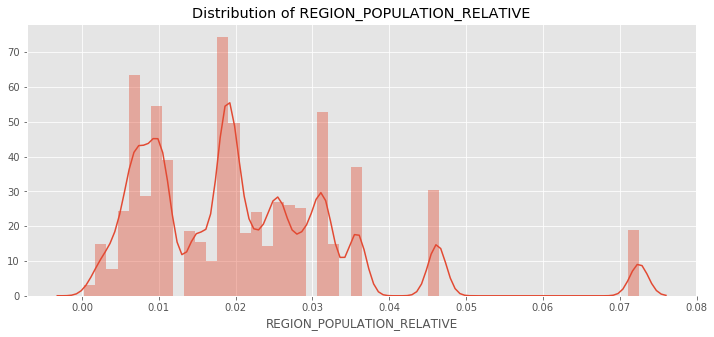

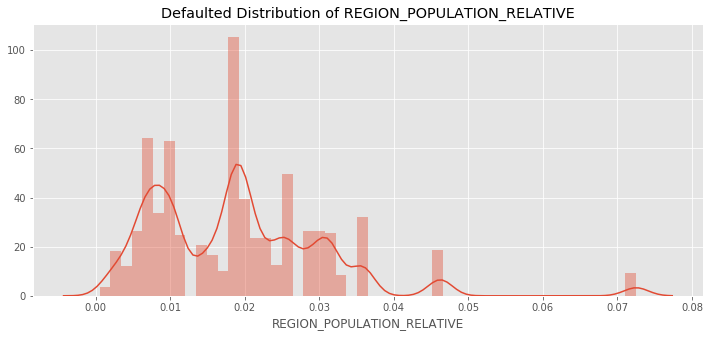

In [152]:
plot_histo("REGION_POPULATION_RELATIVE")

## DAYS_BIRTH

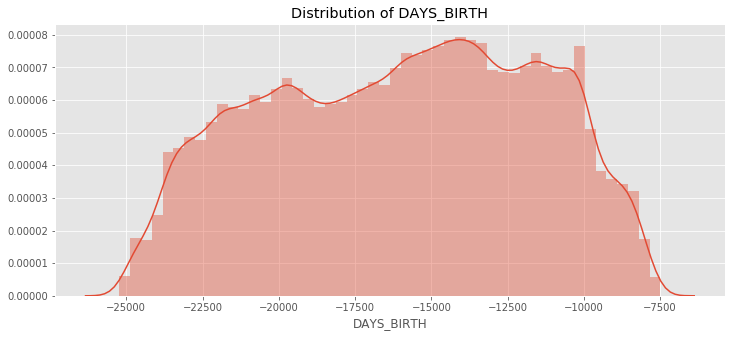

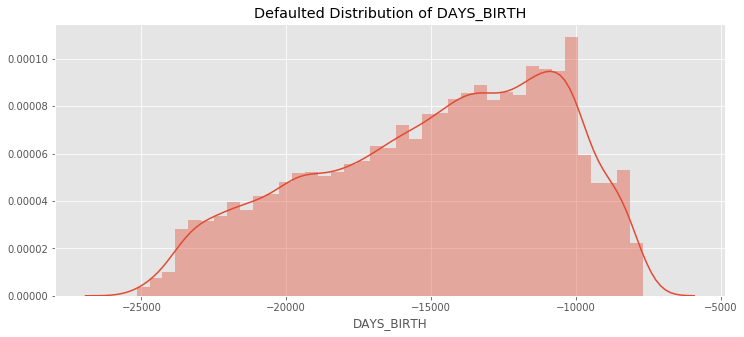

In [153]:
plot_histo("DAYS_BIRTH")

## DAYS_EMPLOYED

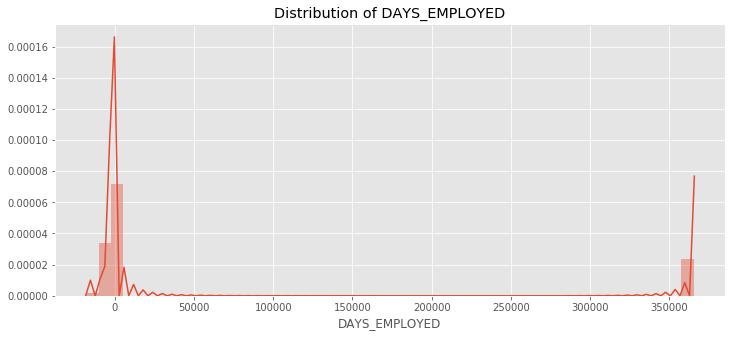

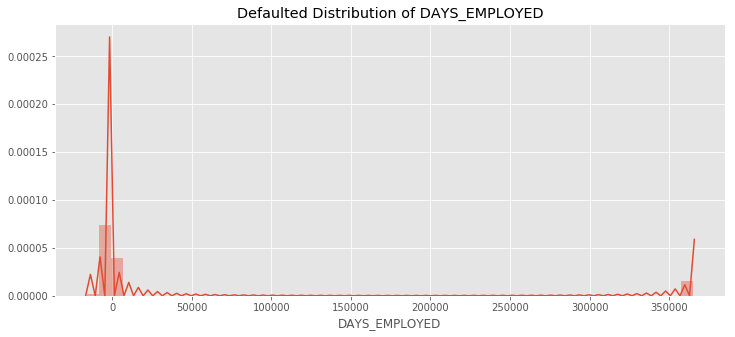

In [157]:
plot_histo("DAYS_EMPLOYED")

## DAYS_REGISTRATION

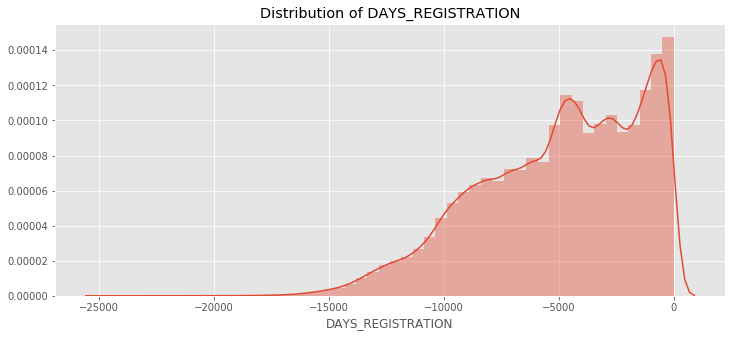

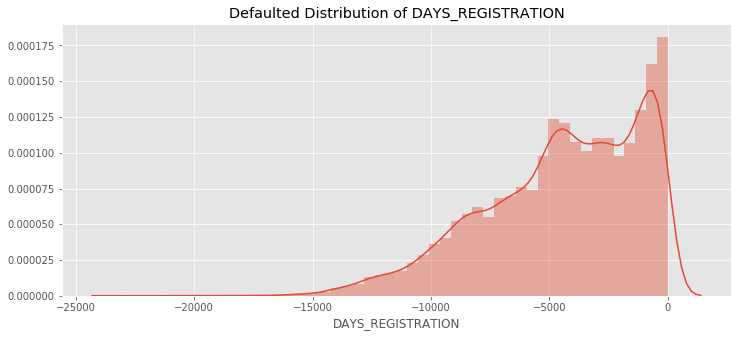

In [159]:
plot_histo("DAYS_REGISTRATION")

## DAYS_ID_PUBLISH

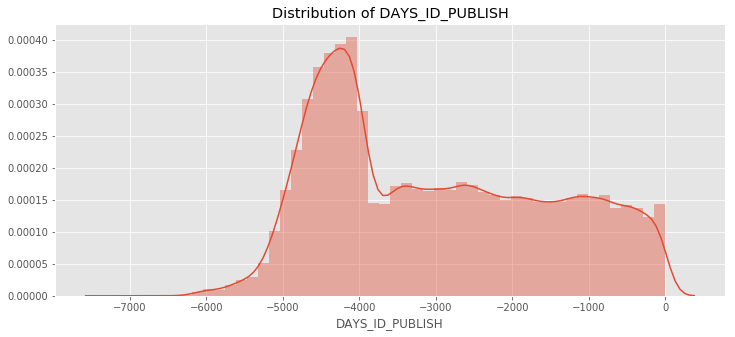

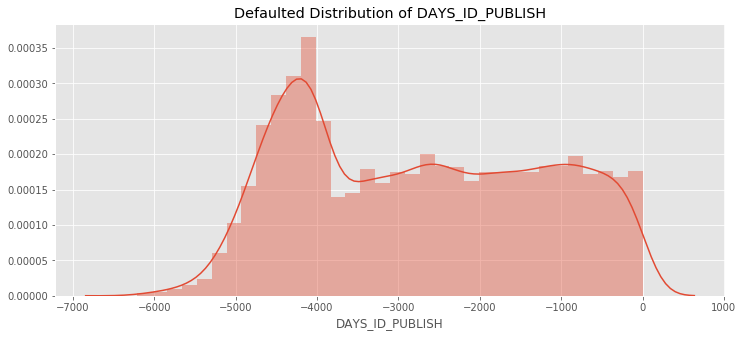

In [162]:
plot_histo("DAYS_ID_PUBLISH")

## OWN_CAR_AGE

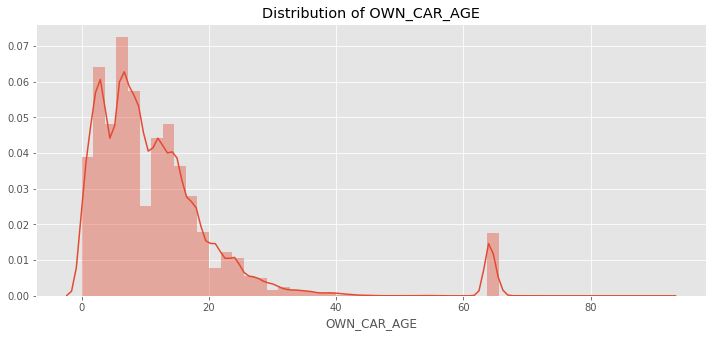

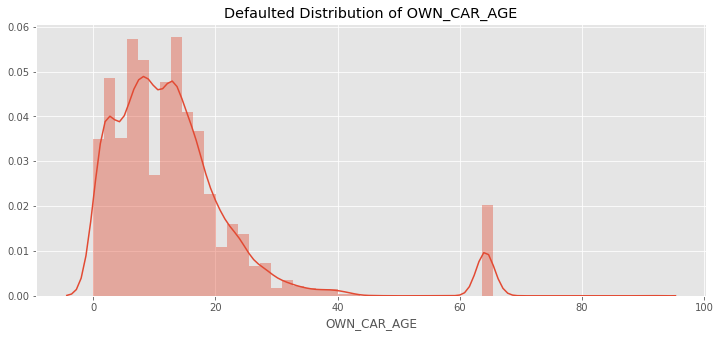

In [163]:
plot_histo("OWN_CAR_AGE")

## FLAG_MOBIL

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


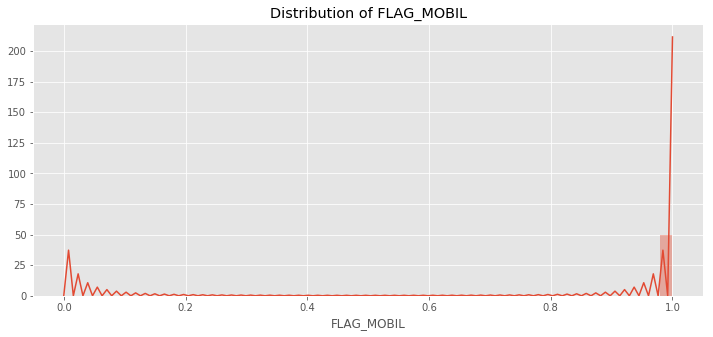

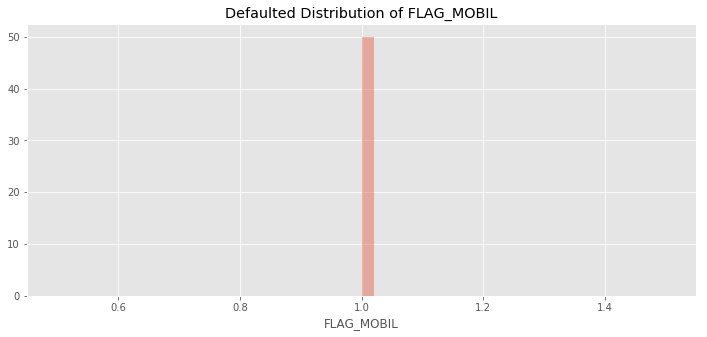

In [168]:
plot_histo("FLAG_MOBIL")

In [173]:
train["FLAG_MOBIL"].value_counts()

1    307510
0    1     
Name: FLAG_MOBIL, dtype: int64

This shows that this column is kind of not important because all the values is 1 except for 1 entry 

## FLAG_EMP_PHONE

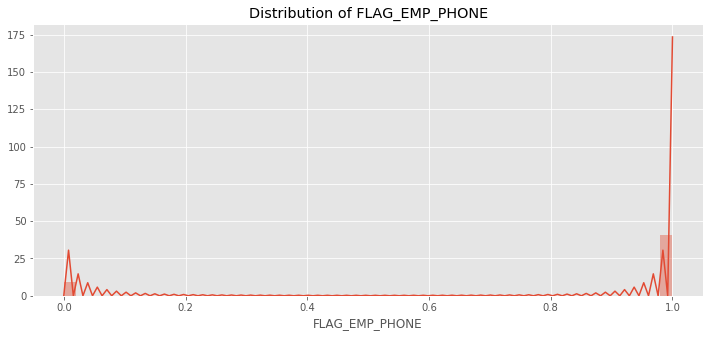

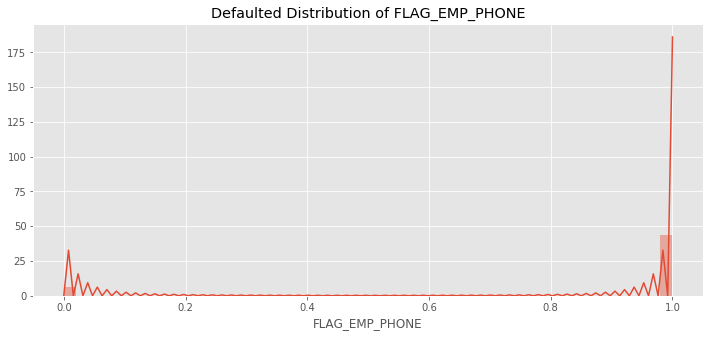

In [176]:
plot_histo("FLAG_EMP_PHONE")

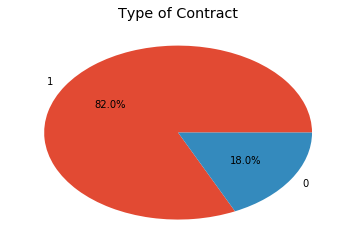

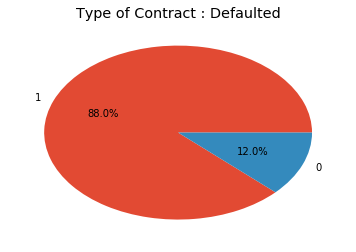

In [179]:
plot_pie("FLAG_EMP_PHONE")

## FLAG_WORK_PHONE

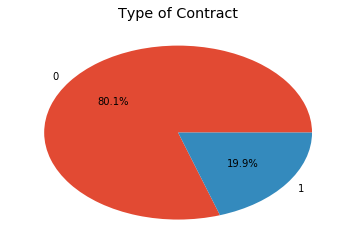

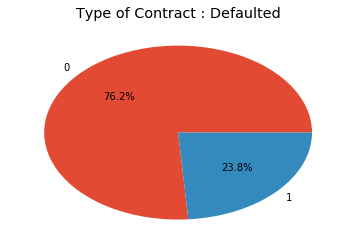

In [182]:
plot_pie("FLAG_WORK_PHONE")

## FLAG_CONT_MOBILE

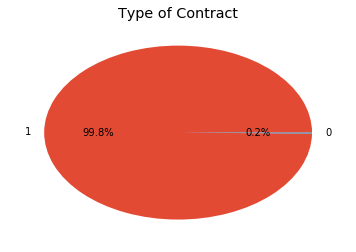

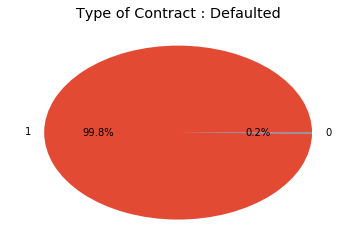

In [186]:
plot_pie("FLAG_CONT_MOBILE")

In [187]:
train["FLAG_CONT_MOBILE"].value_counts()

1    306937
0    574   
Name: FLAG_CONT_MOBILE, dtype: int64

## FLAG_PHONE

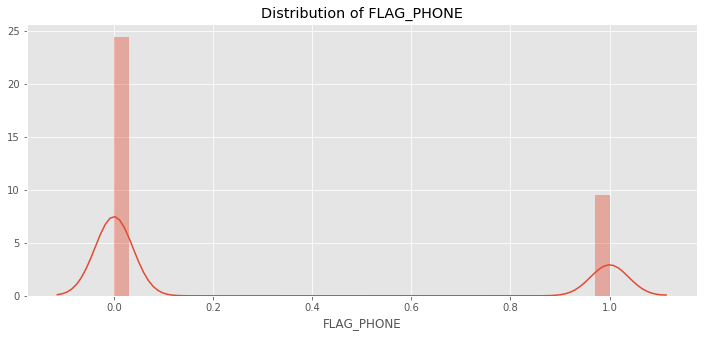

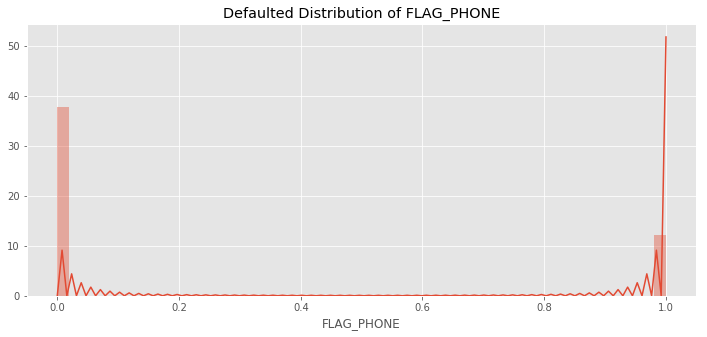

In [189]:
plot_histo("FLAG_PHONE")

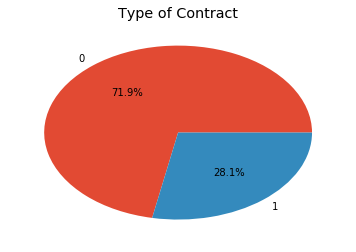

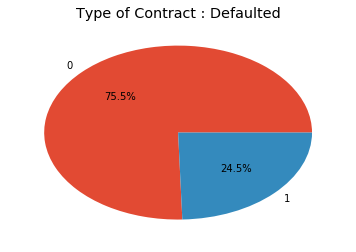

In [190]:
plot_pie("FLAG_PHONE")

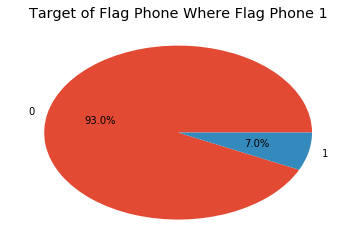

In [205]:
true_contract_set = train[train["FLAG_PHONE"] == 1]
true_contract_set["TARGET"]

true_contract_set = true_contract_set["TARGET"].value_counts()

true_contract_set = pd.DataFrame({'labels': true_contract_set.index,
                       'values': true_contract_set.values
                      })

plt.pie(true_contract_set['values'],labels = true_contract_set['labels'],autopct='%1.1f%%')
plt.title('Target of Flag Phone Where Flag Phone 1')
plt.show()

## FLAG_EMAIL

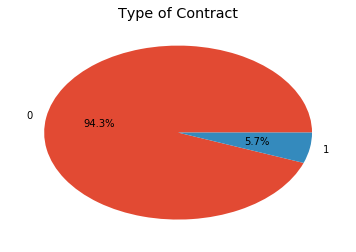

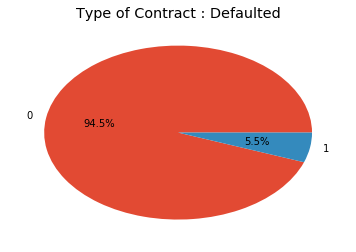

In [204]:
plot_pie("FLAG_EMAIL")

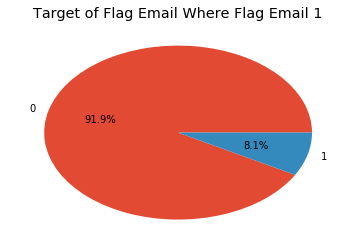

In [209]:
true_email_set = train[train["FLAG_EMAIL"] == 0]
true_email_set = true_email_set["TARGET"].value_counts()
true_email_set = pd.DataFrame({'labels': true_email_set.index,
                       'values': true_email_set.values
                      })

plt.pie(true_email_set['values'],labels = true_email_set['labels'],autopct='%1.1f%%')
plt.title('Target of Flag Email Where Flag Email 1')
plt.show()

## OCCUPATION_TYPE

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64
Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff           722 
High skill tech staff    701 
Cooking staff            621 
Medicine staff           572 
Accountants              474 
Cleaning staff           447 
Low-skill Laborers       359 
Private service staff    175 
Waiters/barmen s

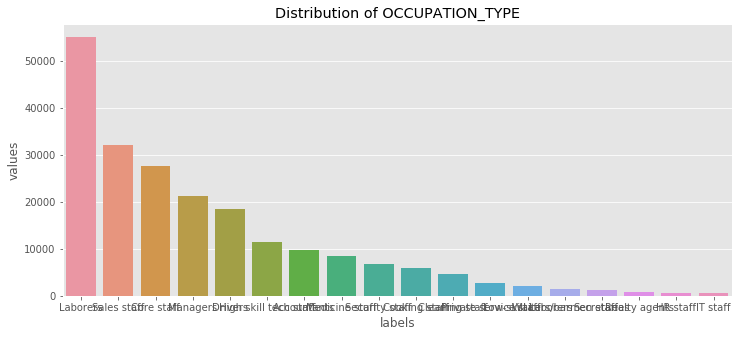

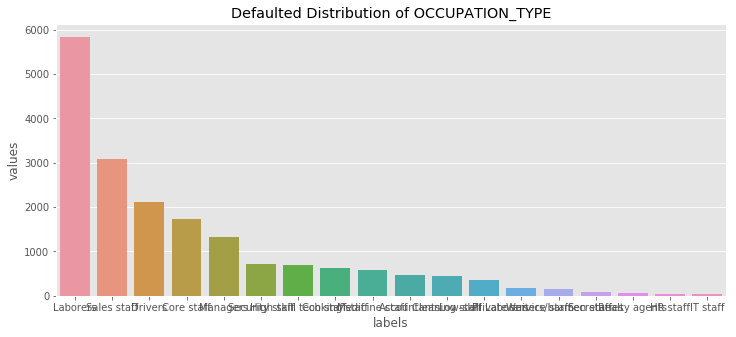

In [211]:
plot_bar("OCCUPATION_TYPE")